# Dik freatisch pakket infiltreert niet lekker (H2O Nr. 5 1995) door Kees Maas

### The problem:

Een infiltratiesloot die afvoert heeft een debiet dat lager is naarmate het pakket dikker is.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

## Analytical solution

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/2281196235.py:12: RuntimeWarning: divide by zero encountered in log
  Phi = np.log(X + 1j * Y)


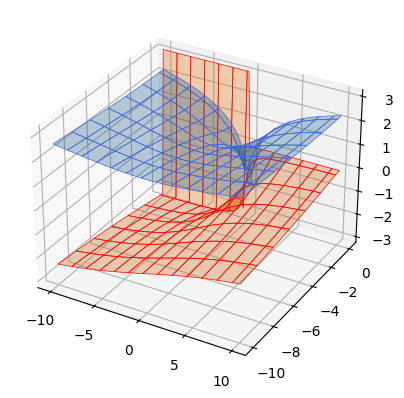

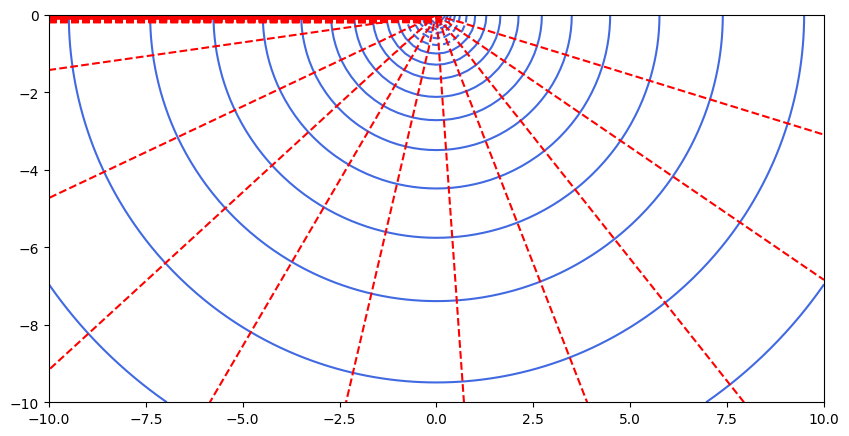

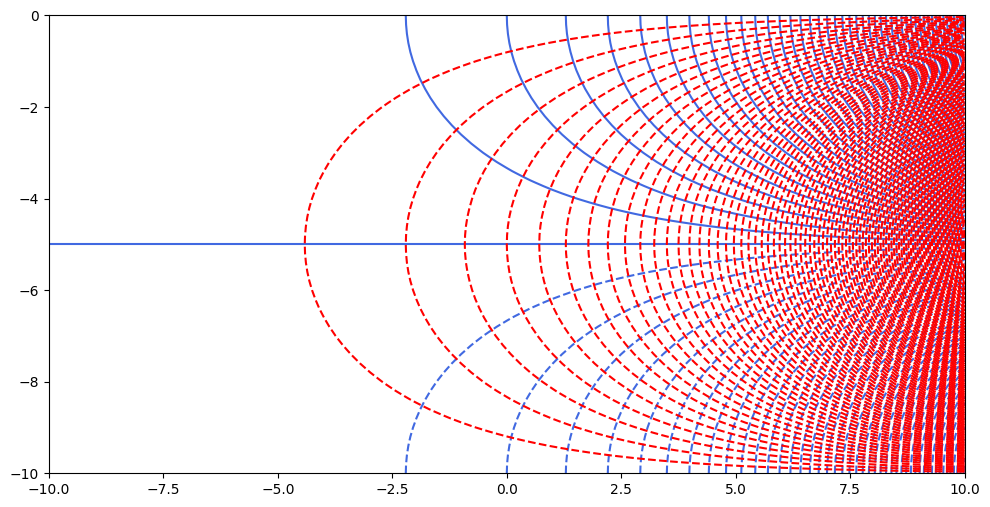

In [3]:
kh, kv = 10., 10.
h, b = 10., 20.
d = 1. # Step size grid
Q = 1.0 # m2/d

x = np.linspace(-10., 10., 101)
y = np.linspace(-10.,  0.,  51)

X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
h = 10.
Phi = np.log(X + 1j * Y)
t = np.exp(np.pi * Z / h)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, Phi.real, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
ax.plot_surface(X, Y, Phi.imag, edgecolor='red', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set(aspect=1.)
ax.contour(Z.real, Z.imag, Phi.real, colors='royalblue', levels=20)
ax.contour(Z.real, Z.imag, Phi.imag, colors='red', levels=20)

fig, ax = plt.subplots(figsize=(10, 6))
 
ax.contour(Z.real, Z.imag, t.real, colors='royalblue', levels=100)
ax.contour(Z.real, Z.imag, t.imag, colors='red', levels=100)

ax.set(aspect=1.)
plt.tight_layout()


## Analytische transformatie voor w = z ** n

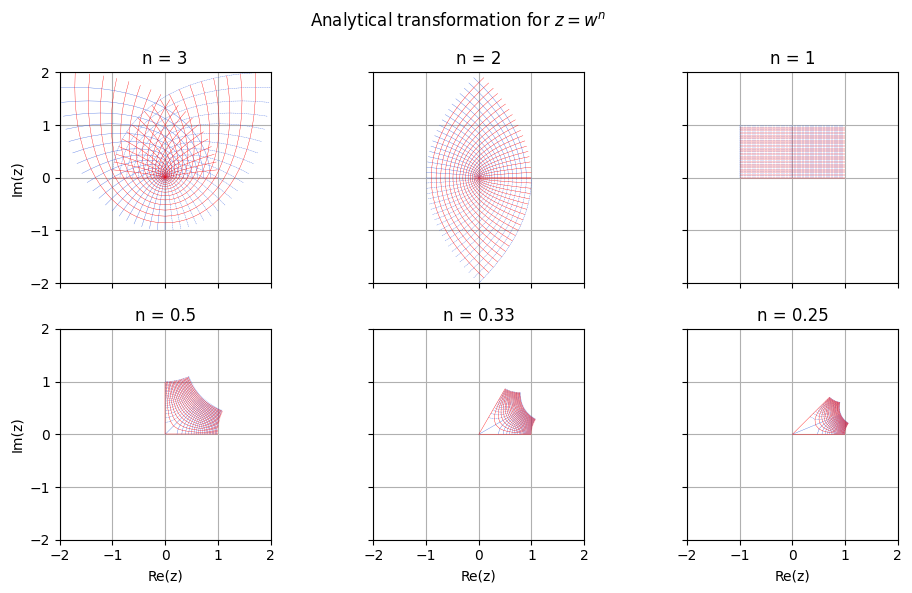

In [4]:

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle(r'Analytical transformation for $z = w^n$')
axs[0, 0].set_ylabel('Im(z)')
axs[1, 0].set_ylabel('Im(z)')
axs[1, 0].set_xlabel('Re(z)')
axs[1, 1].set_xlabel('Re(z)')
axs[1, 2].set_xlabel('Re(z)')

# Kies de Phi en Psi lijnen in het Omega vlak
Q, k = 1.0, 10.
N = 20
phi = np.linspace(-Q, Q, 2 * N + 1) # We can express the extents just as well in terms of Q.
psi = np.linspace(0, Q, N + 1)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi

levels = np.linspace(-Q, Q, 2 * N + 1) # Q will be zero at Phi = 0 so start with -Q, to Q

# Teken dan de isolijnen voor Phi en Psi in het z-vlak
for ax, n in zip(axs.flat, [3., 2., 1, 1/2, 1/3, 1/4]):
    z = Omega ** (n)
    ax.set_title(r"$z=\Omega^{n:.3g}$")
    ax.contour(z.real, z.imag, Omega.real,linewidths=0.25, colors='royalblue', levels=levels)
    ax.contour(z.real, z.imag, Omega.imag,linewidths=0.25, colors='red', levels=levels)
    ax.set_title(f'n = {n:.2g}')
    ax.set(aspect=1.)
    ax.grid()
    
plt.tight_layout()

## Conformal mapping for Omega = Q ln(z)

We'll take a grid of z values and contour the isolines of Omega in the z-plane.

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/3806221889.py:5: RuntimeWarning: divide by zero encountered in log
  Omega= Q * np.log(Z)
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/3806221889.py:5: RuntimeWarning: invalid value encountered in multiply
  Omega= Q * np.log(Z)
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/3806221889.py:11: UserWarning: The following kwargs were not used by contour: 'lw'
  csphi = ax.contour(Z.real, Z.imag, Omega.real, lw=0.5, colors='royalblue', levels=20)
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/3806221889.py:12: UserWarning: The following kwargs were not used by contour: 'lw'
  cspsi = ax.contour(Z.real, Z.imag, Omega.imag, lw=0.5, colors='red', levels=20)


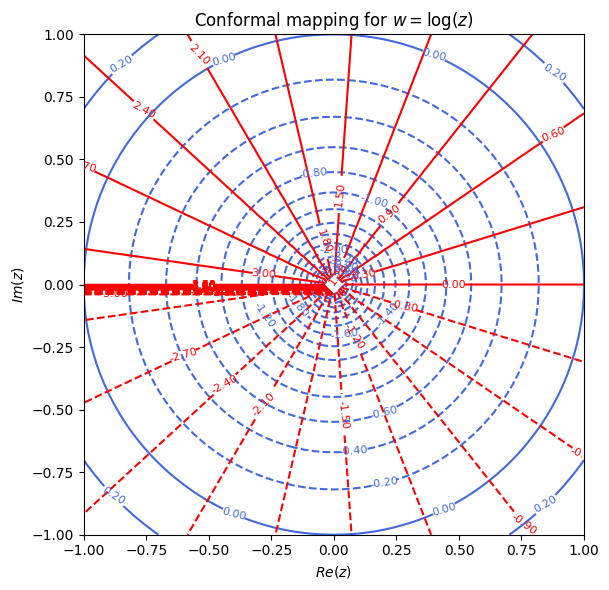

In [5]:
x = np.linspace(-1, 1, 51)
y = np.linspace(-1, 1, 51)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
Omega= Q * np.log(Z)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(r'Conformal mapping for $w = \log(z)$')
ax.set_xlabel(r'$Re(z)$')
ax.set_ylabel(r'$Im(z)$')

csphi = ax.contour(Z.real, Z.imag, Omega.real, lw=0.5, colors='royalblue', levels=20)
cspsi = ax.contour(Z.real, Z.imag, Omega.imag, lw=0.5, colors='red', levels=20)

csphi.clabel(fmt='%1.2f', fontsize=8, colors='royalblue')
cspsi.clabel(fmt='%1.2f', fontsize=8, colors='red')

ax.set(aspect=1.)

plt.tight_layout()

## Conformal mapping for Omega = Q ln(z) or z = exp(Omega / Q)

We'll take a grid of Omega values and contour the isolines of z in the z-plane.

In [ ]:

Q = 1.0
N = 100
phi = np.linspace(0, 2 * np.pi * Q, N + 1)
psi = np.linspace(0, 2 * np.pi * Q, N + 1)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi
z = np.exp(Omega / Q)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(r'Conformal mapping for $z = \exp(\Omega / Q)$')
ax.set_xlabel(r'$Re(z)$')
ax.set_ylabel(r'$Im(z)$')
levels = np.linspace(0, 2 * np.pi * Q, 37)

csphi = ax.contour(z.real, z.imag, Omega.real, lw=0.5, colors='royalblue', levels=levels)
cspsi = ax.contour(z.real, z.imag, Omega.imag, lw=0.5, colors='red', levels=levels)
csphi.clabel(fmt='%1.2f', fontsize=8, colors='royalblue')
cspsi.clabel(fmt='%1.2f', fontsize=8, colors='red')

ax.set_aspect(1.)
plt.tight_layout()

## Conformal mapping for w = sin(z)

We'll take a grid of z values and contour the isolines of Omega in the z-plane.

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/2928209208.py:14: UserWarning: The following kwargs were not used by contour: 'lw'
  csphi = ax.contour(Z.real, Z.imag, Omega.real, lw=0.5, colors='royalblue', levels=20)
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/2928209208.py:16: UserWarning: The following kwargs were not used by contour: 'lw'
  cspsi = ax.contour(Z.real, Z.imag, Omega.imag, lw=0.5, colors='red', levels=20)
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_58028/2928209208.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


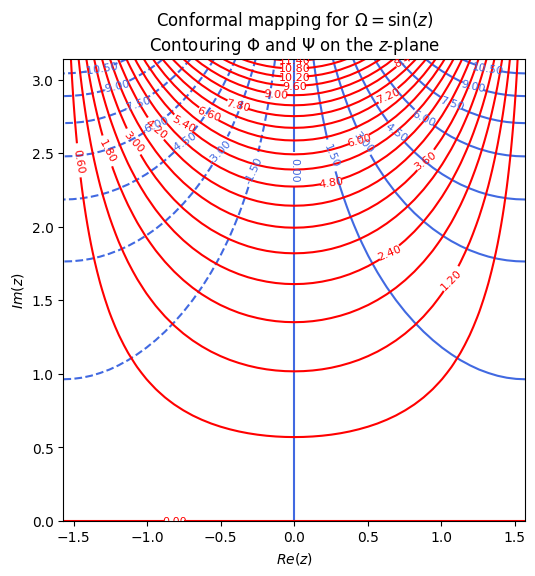

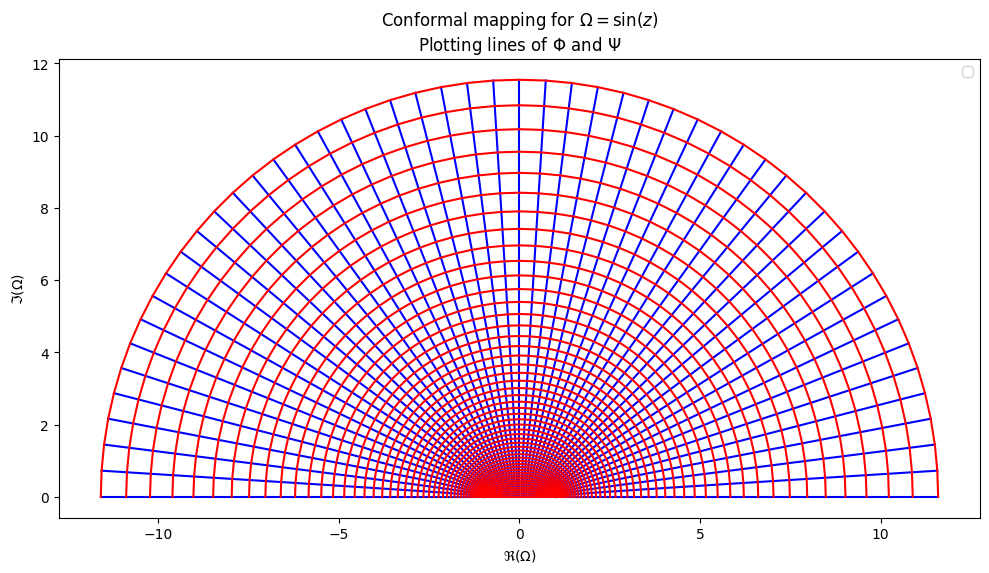

In [6]:
x = np.linspace(-np.pi / 2, np.pi / 2, 51)
y = np.linspace(0, np.pi, 51)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

Omega= np.sin(Z)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(r'Conformal mapping for $\Omega = \sin(z)$' '\n' r"Contouring $\Phi$ and $\Psi$ on the $z$-plane")
ax.set_xlabel(r'$Re(z)$')
ax.set_ylabel(r'$Im(z)$')
ax.set(aspect=1.)

csphi = ax.contour(Z.real, Z.imag, Omega.real, lw=0.5, colors='royalblue', levels=20)

cspsi = ax.contour(Z.real, Z.imag, Omega.imag, lw=0.5, colors='red', levels=20)

csphi.clabel(fmt='%1.2f', fontsize=8, colors='royalblue')
cspsi.clabel(fmt='%1.2f', fontsize=8, colors='red')

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(r'Conformal mapping for $\Omega = \sin(z)$' '\n' r'Plotting lines of $\Phi$ and $\Psi$')
ax.set_xlabel(r'$\Re(\Omega)$')
ax.set_ylabel(r'$\Im(\Omega)$')

ax.plot(Omega.real, Omega.imag, color='blue')
ax.plot(Omega.T.real, Omega.T.imag, color='red')
ax.legend()

ax.set(aspect=1.)
plt.tight_layout()

# Conformal mapping for z = sin(w)

We'll contour Omega in the z-plane and we'll directly plot Omega lines in the same z-plane with perfect overlap.

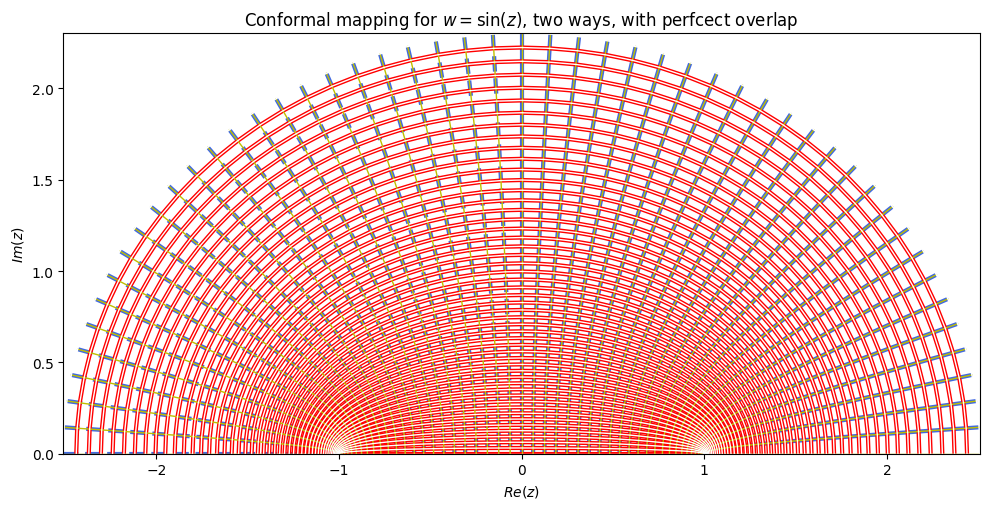

In [7]:

# --- Generate an Omega grid
phi = np.linspace(-np.pi / 2, np.pi / 2, 51)
psi = np.linspace(0, np.pi / 2, 51)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi

Z = np.sin(Omega)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(r'Conformal mapping for $w = \sin(z)$, two ways, with perfcect overlap')
ax.set_xlabel(r'$Re(z)$')
ax.set_ylabel(r'$Im(z)$')

# Contouring Omega in the z-plane
ax.contour(Z.real, Z.imag, Omega.real, linewidths=3, colors='royalblue', levels=phi)
ax.contour(Z.real, Z.imag, Omega.imag, linewidths=3, colors='red', levels=psi)

# Plotting  the Omega lines in the z-plane
ax.plot(Z.real, Z.imag, 'y', lw=1, )
ax.plot(Z.T.real, Z.T.imag, 'w', lw=1)

ax.set(aspect=1.)
plt.tight_layout()

## Analytische transformatie voor flow in a infinite layer (Verruijt 1970. p111-112)

In [ ]:
def inflayer(Omega, h, Q):
    """Analytical transformation for flow in a infinite layer."""
    return h / np.pi * np.log((np.cosh(np.pi * Omega / Q) - 1) / 2)

h, Q = 10., 1.
phi = np.linspace(0, 1, 51)
psi = np.linspace(0, Q, 51)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi
z = inflayer(Omega, h, Q)
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(Omega.real, Omega.imag, z.real, colors='royalblue', levels=20)
ax.contour(Omega.real, Omega.imag, z.imag, colors='red', levels=20)

ax.set(aspect=1.)
plt.tight_layout()

## Analytische transformatie voor flow in a contraction (Verruijt 1970. p117-118)

Just contour the Phi and Psi on the z-grid

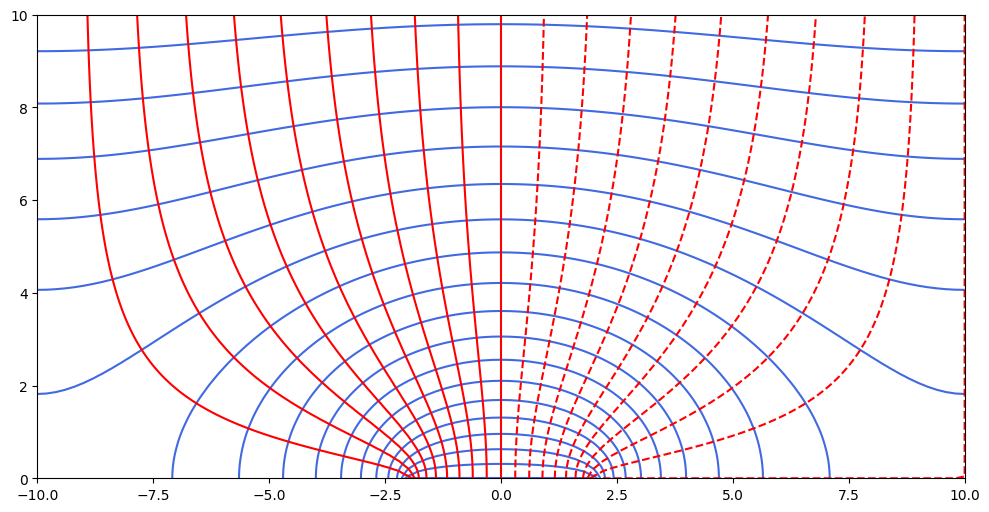

In [8]:
def contraction(z, p, a, Q):
    """Analytical transformation for flow in a contraction."""
    return - 2 * 1j * Q / np.pi * np.arcsin(np.sin(np.pi * z / (2 * a)) / np.sin(np.pi * p / (2 * a)))

a, p, Q = 10., 2., 1.
x = np.linspace(-a, a, 101)
y = np.linspace(0, 5*p, 251)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
Phi = contraction(Z, p, a, Q)
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(Z.real, Z.imag, Phi.real, colors='royalblue', levels=20)
ax.contour(Z.real, Z.imag, Phi.imag, colors='red', levels=20)

ax.set_aspect(1.)
plt.tight_layout()

## Analytische transformatie voor sloot met halve breedte $b$ in aquifer dik $d$
# Transformatie stappen worden een voor een getoond
$$\zeta_{0}=z$$

$$\zeta_{1}=\pi\left(\frac{1}{2}+i\frac{z}{d}\right)$$

$$\zeta_{2}=\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)$$

$$\zeta_{3}=p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q$$

$$\zeta_{4}=\arcsin\left[p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q\right]$$

$$\zeta_{5}=d\left[\frac{1}{\pi}\arcsin\left[p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q\right]-\frac{1}{2}\right]$$
 
$$\zeta_{6}=-id\left[\frac{1}{\pi}\arcsin\left[p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q\right]-\frac{1}{2}\right]$$

$$\Omega=-iQ\left[\frac{1}{\pi}\arcsin\left[p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q\right]-\frac{1}{2}\right]$$

### De tweede grafiek berekent $Z$ voor een regelmatig grid van $\Omega$ waarden.

$$\beta=\sin\left(\pi\left(-\frac{1}{2}+i\frac{b}{d}\right)\right)$$

$$p=\frac{-2}{\beta+1};q=\frac{\beta-1}{\beta+1}$$

TO 2025-11-22


## Analytische transformatie voor sloot tussen 0 en a in aquifer dik d

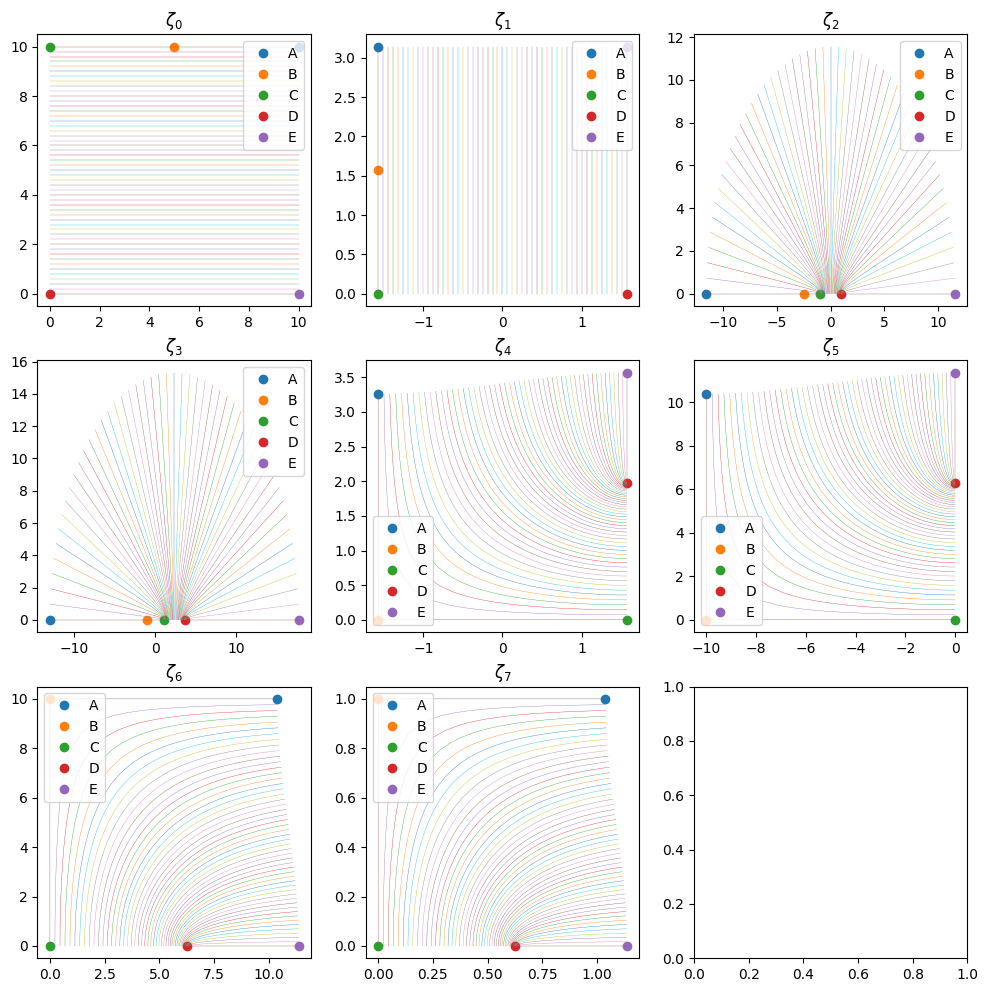

In [9]:
d = 10. # Thickness, lies at y=iH
b = 5.
le = 2 * b

A = le + 1j * (d - 1e-6)
B = b + 1j * d
C = 0 + 1j * d
D = 0
E = le

Q = 1.0

x = np.linspace(0, le, int(le/0.2) + 1).clip(1e-6, le)
y = np.linspace(0, d, int(d/0.2) + 1).clip(1e-6, d - 1e-6)
X, Y = np.meshgrid(x, y)
z = X + 1j * Y

def wplane(i, z, b, d):
    w = z
    if i > 0:
        w = np.pi * (1 / 2 + 1j * w / d)
    if i > 1:
        w = np.sin(w)
    if i > 2:
        beta = np.sin(np.pi * (- 1 / 2 +  1j * b / d))
        p, q = -2 / (beta + 1), (beta - 1) / (beta + 1)
        w = w * p + q        
    if i > 3:
        w = np.arcsin(w)
    if i > 4:
        w =  d * (w / np.pi  - 1 /2)
    if i > 5:
        w = -1j * w
    if i > 6:
        w = w * Q / d

    return w


fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for ia, ax in enumerate(axs.ravel()):
    if ia > 7:
        break
    ax.set_title(fr'$\zeta_{ia}$')
    w = wplane(ia, z, b, d)
    for p, pnm in zip([A, B, C, D, E], ['A', 'B', 'C', 'D', 'E']):
        p_ = wplane(ia, p, b, d)
        ax.plot(p_.real, p_.imag, 'o', label=pnm)
    ax.plot(w.real.T, w.imag.T, lw=0.25)
    ax.legend()

## Analytische transformatie voor sloot met halve breedte $b$ in aquifer dik $d$

$$\Omega=-iQ\left[\frac{1}{\pi}\arcsin\left(p\sin\left(\pi\left(\frac{1}{2}+i\frac{z}{d}\right)\right)+q\right)-\frac{1}{2}\right]$$

$$z=-id\left[\frac{1}{\pi}\arcsin\left(\frac{1}{p}\left\{ \sin\left(\pi\left(\frac{1}{2}+i\frac{\Omega}{Q}\right)\right)-q\right\} \right)-\frac{1}{2}\right]$$

$$\beta=\sin\left(\pi\left(-\frac{1}{2}+i\frac{b}{d}\right)\right)$$

$$p=\frac{-2}{\beta+1};\,\,\,q=\frac{\beta-1}{\beta+1}$$

Eerste grafiek berekent $\Omega$ voor een regelmatig net van z-waarden en contourt
vervolgens $\Phi$ en $\Psi$.

De tweede grafiek berekent $Z$ voor een regelmatig grid van $\Omega$ waarden.
TO 2025-11-22

## Analytische transformatie voor sloot met halve breedte $b$ in aquifer dik $d$

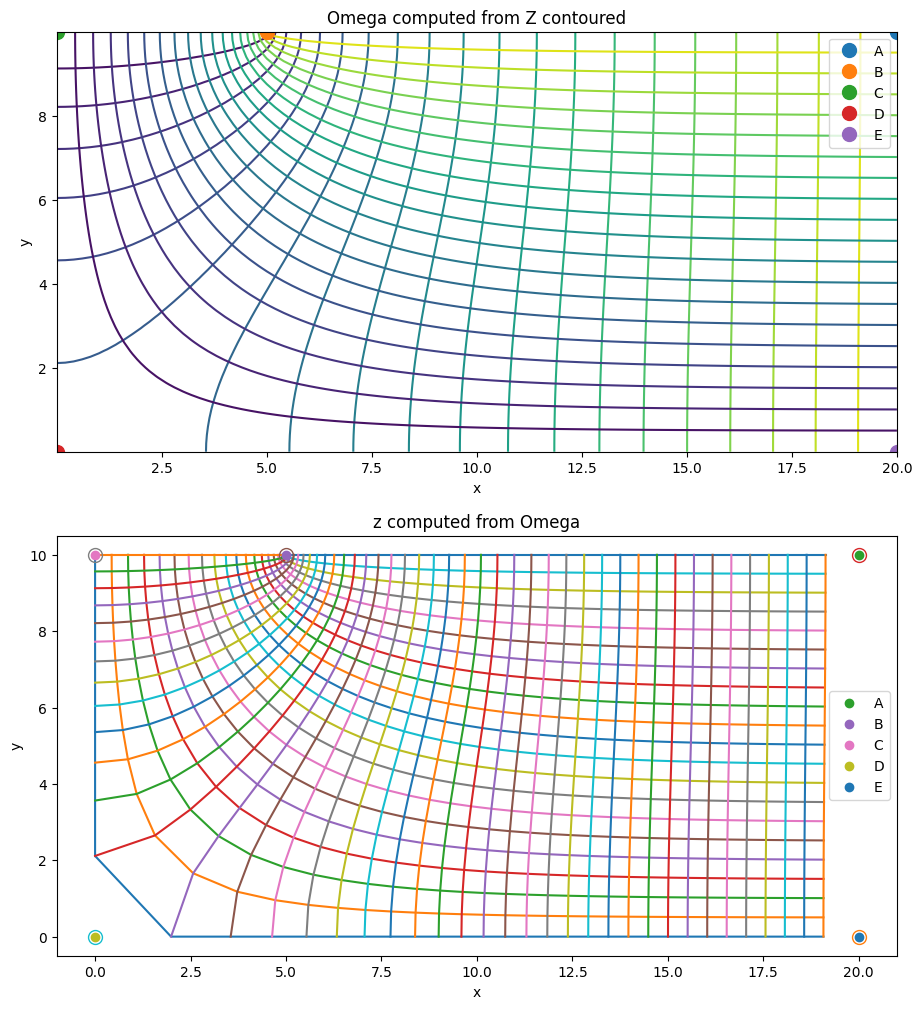

In [10]:
d = 10. # Thickness, lies at y=iH
b = 5.
le = 4 * b

A = le + 1j * (d - 1e-6)
B = b + 1j * d
C = 0 + 1j * d
D = 0
E = le

Q = 1.0

# --- define Z (points in the z-plain)
x = np.linspace(0, le, int(le/0.2) + 1).clip(1e-6, le)
y = np.linspace(0, d,  int(d /0.2) + 1).clip(1e-6, d - 1e-6)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# --- define Omga (points in the omega plain)
phi = np.linspace(0, 2 * Q, int(2 * abs(Q)/0.05) + 1).clip(1e-6, le)
psi = np.linspace(0, Q, int(abs(Q)/0.05) + 1).clip(1e-6, d - 1e-6)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi


def omega_fr_z(z, b, d):
    """Return omega = phi + i psi from z = x + i y.
    
    Note that z = z_fr_omega(omga_fr_z(z, b, d), b, d)
    and       o = omega_fr_z(z_fr_omega(o, b, c), b, d)
    
    Parameters
    ----------
    b: float
        width of the ditch (z = 0 + 1j * d to z = b + 1j * d)
    d: float
        thickness of the aquifer (y = 1j * d)
    """
    beta = np.sin(- np.pi / 2 +  1j * np.pi * b / d)
    p, q = -2 / (beta + 1), (beta - 1) / (beta + 1)

    sarg = np.pi * (1 / 2 + 1j * z / d)

    omeg = -1j * Q * (np.arcsin(p * np.sin(sarg) + q) / np.pi - 1 / 2)

    return omeg


def z_fr_omega(omeg, b, d):
    """Return z = x + i y from omega = phi + i psi).
    
    Note that z = z_fr_omega(omga_fr_z(z, b, d), b, d)
    and       o = omega_fr_z(z_fr_omega(o, b, c), b, d)
    
    Parameters
    ----------
    b: float
        width of the ditch (z = 0 + 1j * d to z = b + 1j * d)
    d: float
        thickness of the aquifer (y = 1j * d)
    """
    beta = np.sin(- np.pi / 2 +  1j * np.pi * b / d)
    p, q = -2 / (beta + 1), (beta - 1) / (beta + 1)
    
    sarg = np.pi * (1/2 + 1j * omeg / Q)

    z = -1j * d  * (np.arcsin( (np.sin(sarg)  - q) / p) / np.pi - 1 / 2)
    return z

# --- Plot omega and z
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12))

# --- plot omega from Z
om   = omega_fr_z(Z, b, d)
ax1.set_title('Omega computed from Z contoured')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.contour(Z.real, Z.imag, om.real, levels=20)
ax1.contour(Z.real, Z.imag, om.imag, levels=20)
ax1.set_aspect(1)


# --- plot Z from Omega
zpl  = z_fr_omega(Omega, b, d)
ax2.set_title('z computed from Omega')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.plot(zpl.real.T, zpl.imag.T)
ax2.plot(zpl.real, zpl.imag)
ax2.set_aspect(1)

# --- plot the marker points
for zpt, pnm in zip([A, B, C, D, E], ['A', 'B', 'C', 'D', 'E']):
    opt = omega_fr_z(zpt, b, d)
    ax1.plot(zpt.real, zpt.imag, 'o', ms=10, label=pnm)
    
    zpt_ = z_fr_omega(opt, b, d)
    ax2.plot(zpt_.real,  zpt_.imag,  'o', label=pnm)
    ax2.plot(zpt.real,   zpt.imag, 'o', ms=10, mfc='none')

ax1.legend()
ax2.legend()


## De extra verlaging door de sloot

De extra verlaging door de sloot volgt uit de limit van $\Omega$ voor $z\rightarrow +\infty$. Deze limit blijkt

$$ \lim_{z\rightarrow +\infty}\left(\Omega(x)\right)=-Q\left(\frac x d + \frac 1 \pi \ln p\right)$$

De extra verlaging als gevolg van de sloot is dus

$$\Delta \Omega = \Delta \Phi + i \Delta \Psi = k \Delta \phi +i  \Delta \Psi= -Q \left(\frac x d + \frac 1 \pi \ln p\right)$$

Wat onafhankelijk is van $\Psi$ voor $x \rightarrow \infty$. Dus

$$\Delta \phi = -\frac Q {\pi k} \ln p$$

Wanneer we vanaf de rand van de sloot ($x=b$) rekenen in plaats van het midden waar $x=0$ dan wordt dit:

$$ \Delta \phi = -\frac Q k \left(\frac b d + \frac 1 \pi \ln p \right) $$

$$ \Delta \phi = -\frac Q {k d} b - \frac Q \pi \frac b k \ln p $$

Dus een stukje stroomlengte te grootte van de halve slootbreedte +
de bijdrage door de contractie van stroomlijnen

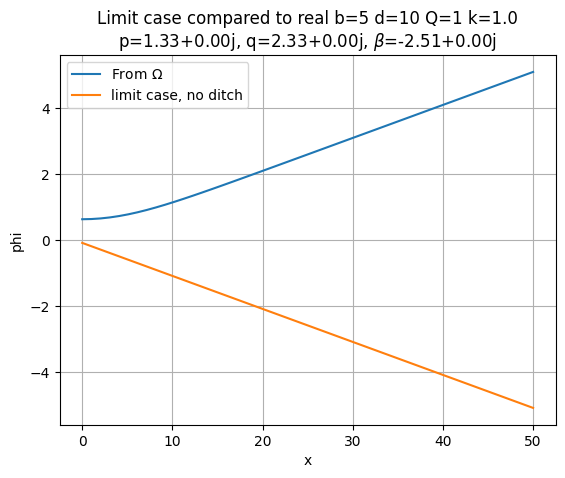

In [11]:
b, d, Q, k = 5, 10, 1, 1
def beta_pq(b, d):
    beta = np.sin(- np.pi / 2 +  1j * np.pi * b / d)
    p, q = -2 / (beta + 1), (beta - 1) / (beta + 1)
    return p, q, beta

z = np.linspace(0, 10 * b) + 1j * 0
p, q, beta = beta_pq(b, d)

om = omega_fr_z(z, b, d)
k = 1.0
phi_o = om / k
phi = -Q * (z.real / d + 1 / np.pi * np.log(p))
fig, ax = plt.subplots()
ax.set_title(fr"Limit case compared to real b={b} d={d} Q={Q} k={k}"
             '\n'
             fr'p={p:.2f}, q={q:.2f}, $\beta$={beta:.2f}'             
             )
ax.set_xlabel('x')
ax.set_ylabel('phi')
ax.plot(z, phi_o.real, label=r'From $\Omega$')
ax.plot(z, phi, label='limit case, no ditch')
ax.grid(True)
ax.legend()

## Analytical solution for flow into a ditich of width b into an aquifer of half-infinite extent

Method 1: Drawing the Phi and Psi lines in the z-plane, starting with a grid of Omega coordinates.

There are the following point marking the cross section, which hat its bottom at y=-iH and its op at y=0, and the ditch between z=a and z=a + b

Ctop : z = 1.5 * b
Cbot : z = 1.5 * b -1j * H
A :    z = a
B :    z = b
D :    z = 0 - 1j * H

b > a
Breedte van de sloot tussen A en B is b - a

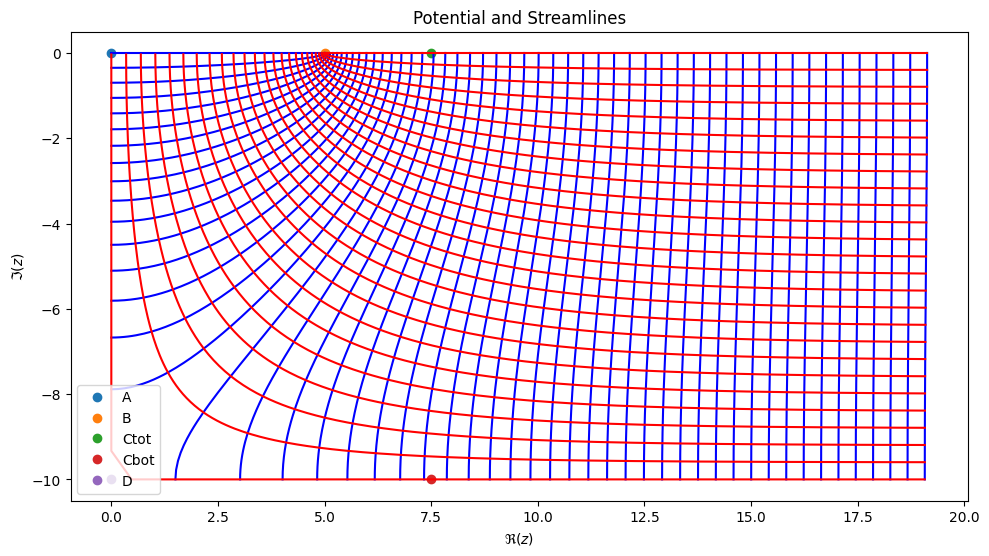

In [ ]:
def get_points(H=None, b=None, a=0.):
    """Get the points A, B, Ctop, Cbot, D for the conformal mapping."""
    Ctop = 1.5 * b
    B =    b
    A =    a
    D =    0.      -1j * H   
    Cbot = 1.5 * b - 1j * H
    return ('A', 'B', 'Ctot', 'Cbot', 'D'), (A, B, Ctop, Cbot, D)


def zeta(i=0, z=None, H=None, A=None, B=None):
    """Return the values on the respective zeta planes"""
    w = z
    if i > 0:
        w = 1j * np.pi / H * w - H / 2        
    if i > 1:
        w = np.sin(w)
    if i > 2:
        w3A = zeta(3, A)
        w3B = zeta(3, B)
        p = -2 / (w3A - w3B)
        q = (w3A + w3B) / (w3A - w3B)
        w = p * w + q
    if i > 3:
        w = np.arcsin(w)
    if i > 4:
        w = 1j * H * (w / np.pi + 1 / 2)
    if i > 5:
        w = Q / H * Q
    
    return w

def omega():
    
def get_pq(H=None, A=None, B=None):
    """Calculate p and q for the conformal mapping."""
    w3A = zeta(3, A, H)
    w3B = zeta(3, B, H)
    p = -2 / (w3A - w3B)
    q = (w3A + w3B) / (w3A - w3B)
    return p, q

    
Q, H, b, a = 1.0, 10., 25., 20.
Q, H, b, a = 1.0, 10., 5., 0.

nms, pnts = get_points(H=H, b=b, a=a)
A, B, Ctop, Cbot, D = pnts



# Because we draw the lines (no contouring) use many points
# and only plot every 10th line.
phi = np.linspace(0, 2 * Q, 501).clip(1e-6, None)
psi = np.linspace(0, 1 * Q, 251).clip(1e-6, Q - 1e-6)

Phi, Psi = np.meshgrid(phi, psi)

Omega = Phi + 1j * Psi

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Potential and Streamlines')
ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')

Z = z_plane(Omega, Q=Q, b=b, a=a, H=H)

# Plot the marker points
for nm, pnt in zip(nms, pnts):
    ax.plot(pnt.real, pnt.imag, 'o', label=nm)
ax.legend()

lines1 = ax.plot(Z.real[:, ::10], Z[:, ::10].imag, color='blue')
lines2 = ax.plot(Z.T[1:, ::10].real, Z.T[1:, ::10].imag, 'red')

ax.set_aspect(1)
plt.tight_layout()

## Analytical solution for flow into a ditich of width b into an aquifer of half-infinite extent

Method 2: Contouring Phi and Psi in the z-plane (using a grid of z-coordinates)

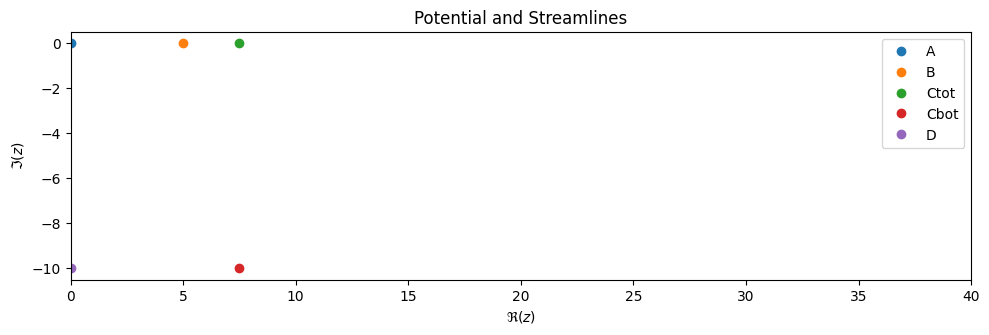

In [ ]:
def get_points(H=None, b=None, a=0.):
    """Get the points A, B, Ctop, Cbot, D for the conformal mapping."""
    Ctop = 1.5 * b
    B =    b
    A =    a
    D =    0.      -1j * H   
    Cbot = 1.5 * b - 1j * H
    return ('A', 'B', 'Ctot', 'Cbot', 'D'), (A, B, Ctop, Cbot, D)

def w_plane(z=z, Q=None, H=None, b=None, a=0.):
    p, q = get_pq_a(H, b=b, a=a)
    sin = np.sin(np.pi / H * (1j * z - H / 2))    
    return -1j * Q / np.pi * (np.arcsin(p * sin + q) - np.pi/ 2)
    
def get_Z(x, y):
    """Return grid in the z-plane"""
    y=y.clip(0.001, y.max() - 0.01) # keep bottom streamline inside model
    X, Y = np.meshgrid(x, y)    
    return X + 1j * Y


Q, H, b, a = 1.0, 10., 25., 20.
Q, H, b, a = 1.0, 10., 5., 0.

nms, pnts = get_points(H=H, b=b, a=a)

x = np.linspace(0, 4 * H, 51)
y = np.linspace(-H, 0, 26)
Z = get_Z(x, y)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Potential and Streamlines')
ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')

Omega = w_plane(z=Z, Q=Q, H=H, b=b, a=a)

# Plot the marker points
for nm, pnt in zip(nms, pnts):
    ax.plot(pnt.real, pnt.imag, 'o', label=nm)
ax.legend()

phi_levels = np.linspace(0, 2 * Q, 21) 
psi_levels = np.linspace(0, Q, 21)

cs1 = ax.contour(Z.real, Z.imag, Omega.real, colors='blue', levels=phi_levels)
cs2 = ax.contour(Z.real, Z.imag, Omega.imag, colors='red', levels=psi_levels)

ax.set_aspect(1.0)
plt.tight_layout()

## Analytical solution for flow into a ditich of width b into an aquifer of half-infinite extent

Method 2: Contouring Phi and Psi in the z-plane (using a grid of z-coordinates)

Now we'll compute the head in the ditch relative to  a point 5 H to
the left of the ditch to see how much the ris in head of the ditch is
as a function of H given it infitlrates a fixed flow Q.

In [ ]:

def get_zPnts(H=None, b=None, a=None, method=None):
    """Get the points A, B, Ctop, Cbot, D for the conformal mapping."""     
    if method == 'sin':        
        zPnts = {   
            'Rt': a + b + 20,              # right top                        
            'Dr': a + b,              # Ditch right            
            'Dl': a,                  # Fixing the ditch to let only H grow 
            'Lt': 0.,                 # Left top
            'Lm': 0. - 1j * 0.5 * H,     # Left middle
            'Lb': 0. - 1j * H,           # Left bottom            
            'Rb': a + b + 20 - 1j * H,     # right bottom
        }
    elif method == 'exp':
        zPnts ={
            'Rt': a + b + 20,         # right top
            'Dr': a + b,              # Ditch right
            'Dl': a,                  # Fixing the ditch to let only H grow 
            'Lt': -np.inf,      # Left top   
            'Lb': -np.inf - 1j * H,       # Left bottom
            'Rb': a + b + 20  - 1j * H,       # right bottom
        }
    else:
        raise ValueError(f"Unknown method {method}")
    return zPnts

def get_pq_a(H=None, b=None, a=None, method='sin'):
    """Calculate p and q for the conformal mapping."""
    zPnts = get_zPnts(H=H, b=b, a=a, method=method)
    ztaPnts = {k: get_zeta(z) for k, z in zPnts.items()}
    ztaDr, ztaDl = ztaPnts['Dr'], ztaPnts['Dl']
    p = 2 / (ztaDl - ztaDr)
    q = 1 - p * ztaDl
    return p, q

def get_Z(H=None, b=None, a=None, method=None, tol=1e-6):
    """Return grid in the z-plane"""
    
    if method == 'sin':
        x = np.linspace(0, 60, 241)
        x[0] += 1e-6 # Keep x completely inside section
    elif method == 'exp':
        x = np.linspace(0, 60, 241)
    else:
        raise ValueError(f"Unknown method {method}")
    
    y = np.linspace(-H, 0, 4 * int(H) + 1)
    # Keep streamlines completely inside the section
    y[ 0] += tol
    y[-1] -= tol
    
    X, Y = np.meshgrid(x, y)    
    return X + 1j * Y

def get_zeta(z, H=None, method=None):
    """Scale z and clap-out the lines +/- pi/2"""    
    if method == 'sin':
        return np.sin(1j * np.pi / H * (z + 1j * H / 2))
    elif method == 'exp':
        return np.exp(np.pi  / H * (z + 1j * H))
    else:
        raise ValueError(f"Unknown method {method}")
    
def get_zeta1(z, H=None, b=None, a=None, method=None):    
    p, q = get_pq(H=H, b=b, a=a, method=method)
    return p * get_zeta(z, H=H, b=b, a=a, method=method) + q

def get_zeta2(z, H=None, b=None, a=None, method=None):
    return np.arcsin(get_zeta1(z, H=H, b=b, a=a, method=method))

def get_w(z=None, H=None, b=None, a=None, method=None):
    global Q    
    return -1j * Q / np.pi * (get_zeta2(z, H=H, b=b, a=a, method=method) - np.pi / 2)


def plot_marker_points(Pnts=None, ax=None):
    """Plot marker points on desired plane.
    
    Pnts: dictionary of nm, pnt
    Pnts should be in the coordinate of the plane.
    ax: plt.Axes on which to plot              
    """
    global H
    for nm, pnt in Pnts.items():
        ax.plot(pnt.real, pnt.imag, 'o', label=nm)
    return ax

def w_inf():
    global b, H
    g = np.exp(np.pi * b  / H)
    q = -(1 + g) / (1 - g)
    return -1j * Q / np.pi * (np.arcsin(q + 0j)-np.pi / 2)

## Method = 'exp'

ValueError: Unknown method None

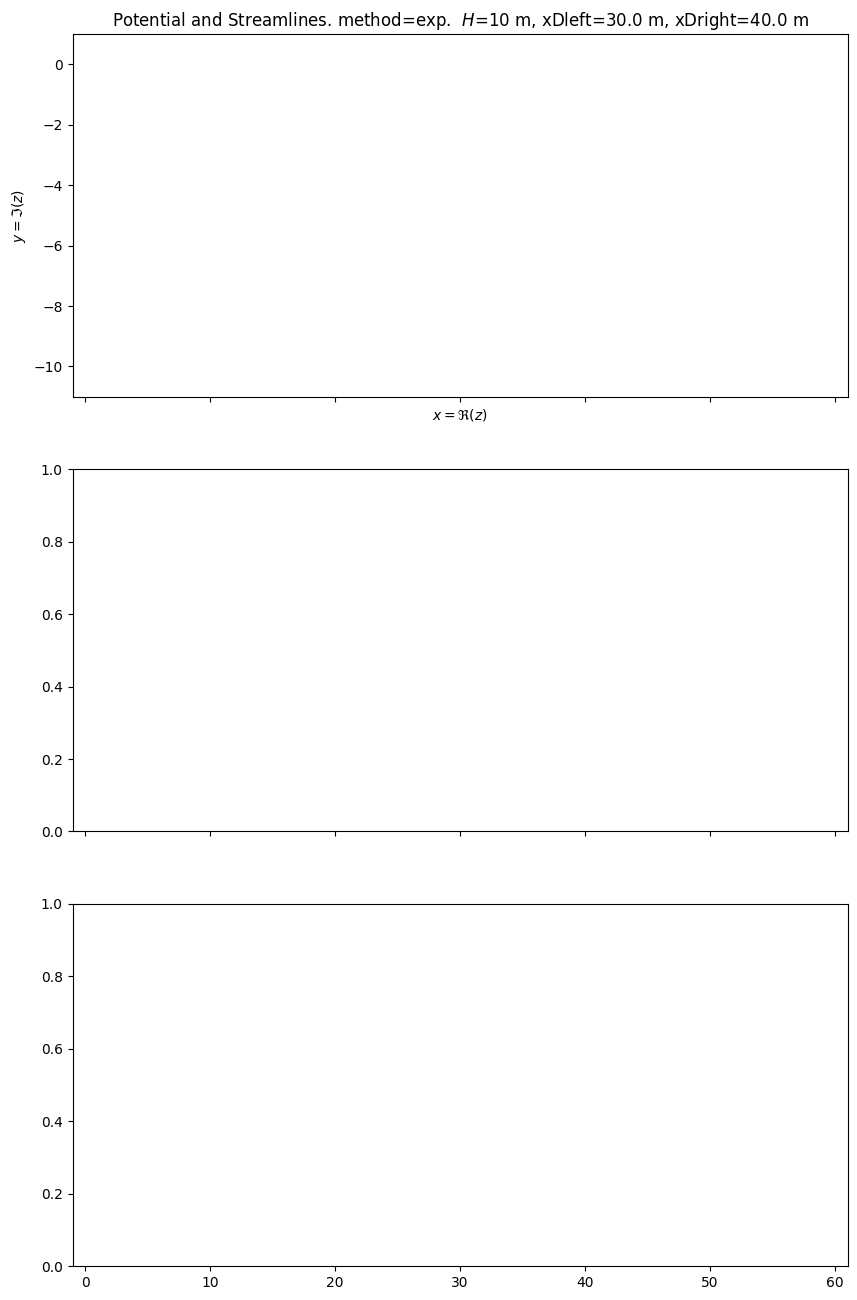

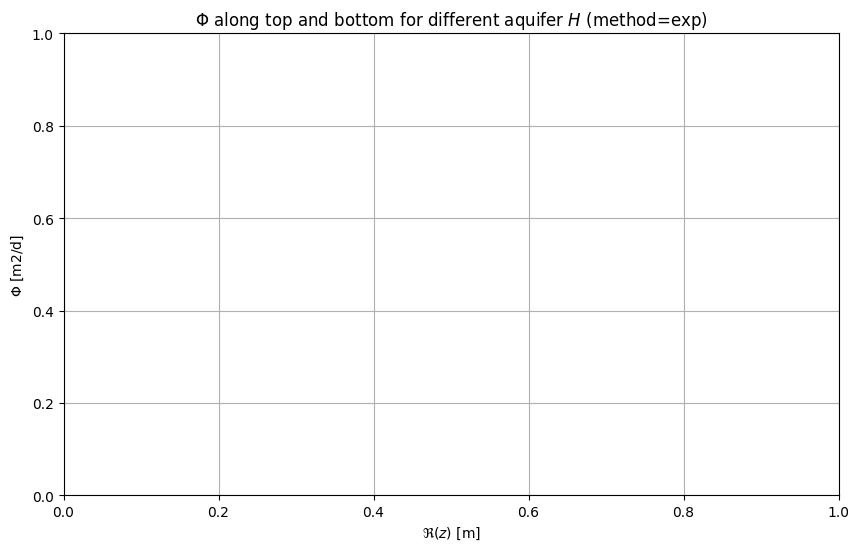

In [23]:
method = 'exp'

Hs = [10, 20, 30]

fig, axs = plt.subplots(len(Hs), 1, sharex=True, figsize=(10, 16))

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(fr"$\Phi$ along top and bottom for different aquifer $H$ (method={method})")
ax1.set_xlabel(r'$\Re(z)$ [m]')
ax1.set_ylabel(r'$\Phi$ [m2/d]')
ax1.grid(True)

clrs = cycle('brgkmc')

phiLm = dict()
phinf = dict()

for H, ax in zip(Hs, axs):
    
    # Fix Q and the left corner and width of the ditch
    Q = 1.0 # m2/d
    a = 30. # x of left side of ditch
    b = 10. # width of ditch

    zPnts = get_zPnts(H=H, a=a, b=b, method=method)
        
    Z = get_Z(H=H, b=b, a=a, method=method, tol=1e-6)
        
    ax.set_title(fr'Potential and Streamlines. method={method}.  $H$={H} m, xDleft={a} m, xDright={a + b} m')
    ax.set_xlabel(r'$x=\Re(z)$')
    ax.set_ylabel(r'$y=\Im(z)$')
    
    x = Z.real[0]
    y = Z.imag.T[0]
    ax.set_xlim(x[0] -1, x[-1] + 1)
    ax.set_ylim(y[0] -1, y[-1] + 1)

    Omega = get_w(z=Z, H=H, b=b, a=a, method=method)

    # Contouring levels
    phi_levels = np.linspace(0, 3 * Q, 31) 
    psi_levels = np.linspace(0, Q, 11)
    phi_levels[0] = 0.001 * Q
    psi_levels[ 0] = 0.00001 * Q
    psi_levels[-1] = 0.99990 * Q

    # Contour potential and stream function
    cs1 = ax.contour(Z.real, Z.imag, Omega.real, colors='blue', levels=phi_levels)
    cs2 = ax.contour(Z.real, Z.imag, Omega.imag, colors='red', levels=psi_levels)

    cs1.clabel(fmt='%1.2f')
    cs2.clabel(fmt='%1.2f')

    plot_marker_points(zPnts, ax)

        
    # Marker point where to compute the potential
    pm = 0.0001 - 0.5j * H    
    plot_marker_points({'Ref': pm}, ax)

    phiLm[H] = np.round(get_w(pm).real, 3)
    phinf[H] = np.round(w_inf(), 3)
    
    ax.text(pm.real + 0.1 * H, pm.imag, fr"$\Phi = ${phiLm[H]:.3f}$\,m^2/d$")
    
    ax.set_aspect(1.0)
    plt.tight_layout()
        
    # Vergelijk de stijghoogte op afstand
    ztop = np.linspace(0, 80, 81) - 0.001j
    zbot = ztop - 0.999j * H
    
    wtop = get_w(ztop)
    wbot = get_w(zbot)
    
    clr=next(clrs)
    ax1.plot(ztop.real[1:], -wtop.real[1:], '-',  color=clr, label=f'top, H={H}')
    ax1.plot(zbot.real[1::5], -wbot.real[1::5], '.-', color=clr, label=f'bot, H={H}')
    
ax1.legend()

print(phinf)
print(phiLm)

fig.savefig(os.path.join('images', "sections"))
fig1.savefig(os.path.join('images', "top_bot_potential"))

plt.show()

fig.savefig(os.path.join('images', f"sections_{method}"))
fig1.savefig(os.path.join('images', f"top_bot_potential_{method}"))

plt.show()
